In [1]:
from _plotly_future_ import v4_subplots
from plotly.subplots import make_subplots

import itertools

import pandas as pd
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1000)
import numpy as np
import scipy as scp
import scipy.stats as ss
import sklearn.metrics as sm

from scipy.integrate import quad
import matplotlib.pyplot as plt

import scipy.special as scps
from statsmodels.graphics.gofplots import qqplot
from scipy.linalg import cholesky
from functools import partial
from scipy.optimize import minimize, brute, fmin
from IPython.display import display
import sympy; sympy.init_printing()
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


def display_matrix(m):
    display(sympy.Matrix(m))

In [11]:
def cf_Heston_schoutens(u, S0, t, mu, v0, kappa, theta, rho, sigma):
    """
    Heston characteristic function as proposed by Schoutens (2004)
    """
    phi = kappa - sigma*rho*u*1j
    d  = np.sqrt( ((-phi)**2) - ((sigma**2) * (-1j*u - u**2 )) )
    g  = (phi-d)/(phi+d)
    
    cf = np.exp((1j*u)*(np.log(S0)+mu*t)) * \
         np.exp((kappa*theta)/(sigma**2) * ( (phi-d)*t - 2*np.log( (1-g*np.exp(-d*t))/(1-g) ))) *\
         np.exp((v0/sigma**2)*(phi-d) * (1-np.exp(-d*t))/(1-g*np.exp(-d*t)) )
    return cf

def RND_Heston(S0, t, mu, v0, kappa, theta, rho, sigma):
    integrand = lambda u: (np.exp(-1j*u*np.log(K)))*\
                cf_Heston_schoutens(u, S0, t, mu, v0, kappa, theta, rho, sigma)
    return 0.5 + 1/np.pi * quad(integrand, limit=10000, a=0, b=np.inf)[0]

In [13]:
integrand = lambda u: (np.exp(-1j*u*np.log(K)))*\
                cf_Heston_schoutens(u, S0, t, mu, v0, kappa, theta, rho, sigma)
0.5 + 1/np.pi * quad(integrand, limit=10000, a=0, b=np.inf)[0]

In [14]:
quad(integrand, limit=10000, a=0, b=np.inf)[0]

In [12]:
v0 = 0.013681                                        # spot variance
rho = -0.620100                                         # correlation coefficient
kappa = 1.605179                                          # mean reversion coefficient
theta = 0.053318                                        # long-term mean of the variance
sigma = 0.590506                                     # (Vol of Vol) - Volatility of instantaneous variance

mu = 0.00                                         # drift
t = T = 24/12                                             # Time to mat
r = 0.00                                          # risk-free rate
K = 1                                            # Stike  
S0 = 1                                          # spot stock price 

alpha = 0.75
RND_Heston(S0, t, mu, v0, kappa, theta, rho, sigma)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:450: ComplexWarning:

Casting complex values to real discards the imaginary part



array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [27]:
density = []

for S0 in np.arange(0.01,2.1,0.01):
    density.append(RND_Heston(S0, t, mu, v0, kappa, theta, rho, sigma))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:450: ComplexWarning:

Casting complex values to real discards the imaginary part



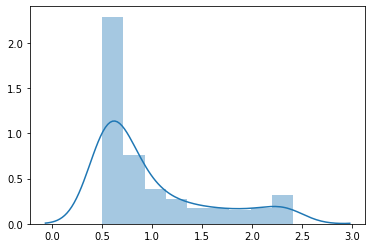

In [29]:
sns.distplot(density)
density

In [ ]:
def cf_Heston(j, ):
    a=kappa*theta
    if j == 1:
        u=0.5
        b=kappa + _lambda - rho * sigma
    elif j==2:
        u=-0.5
        
    
    
    
    
    
    return